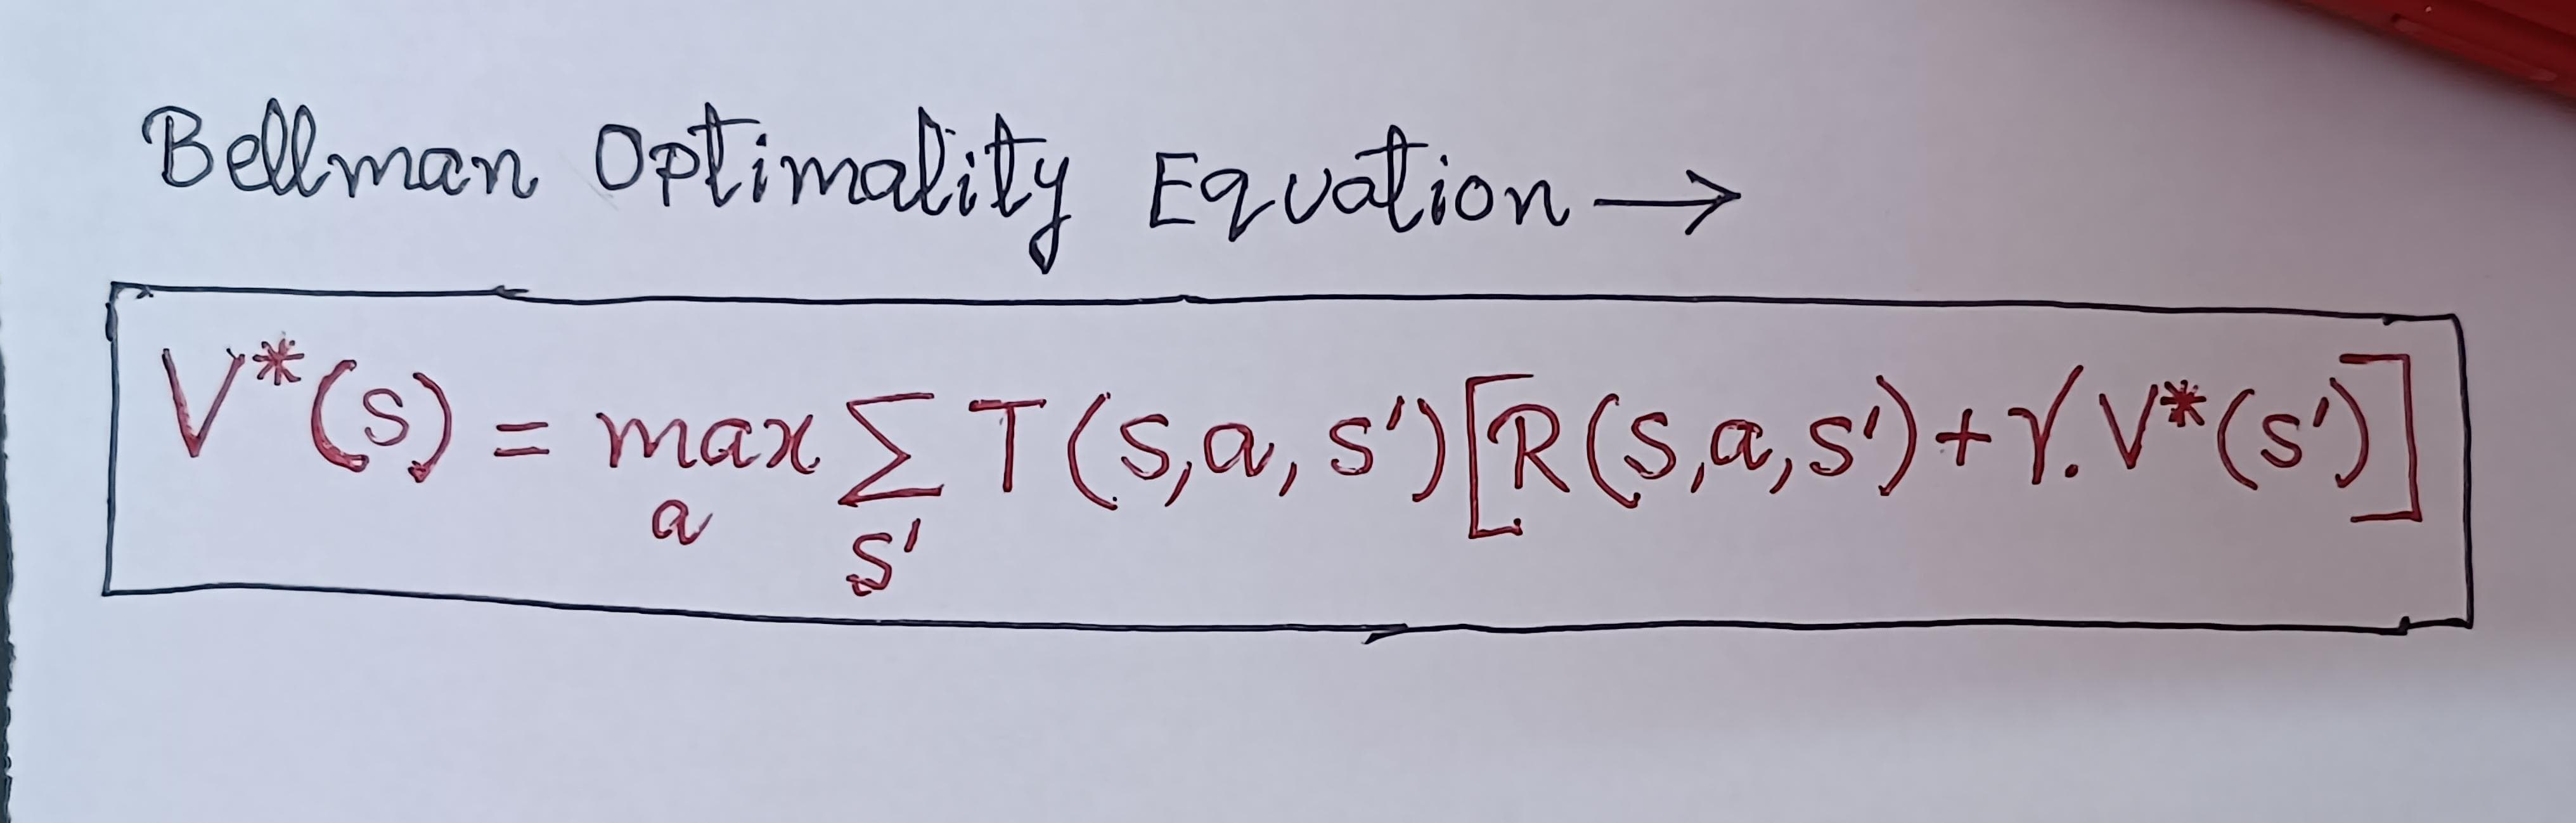

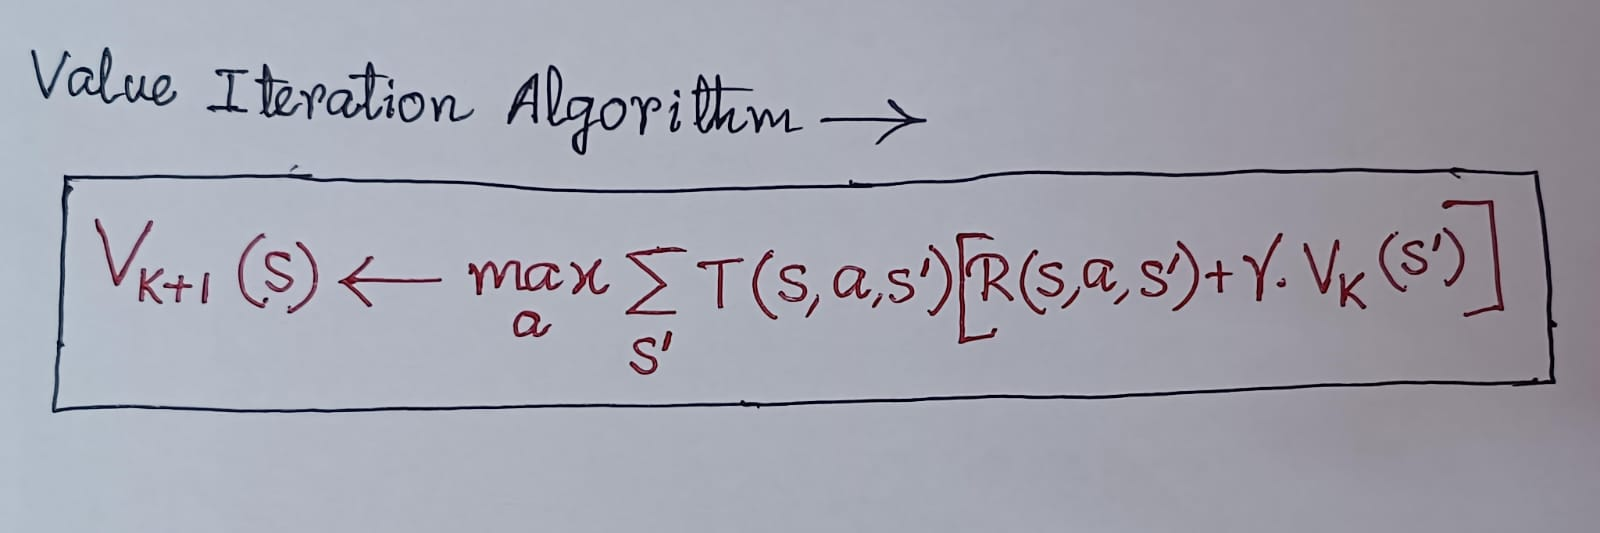

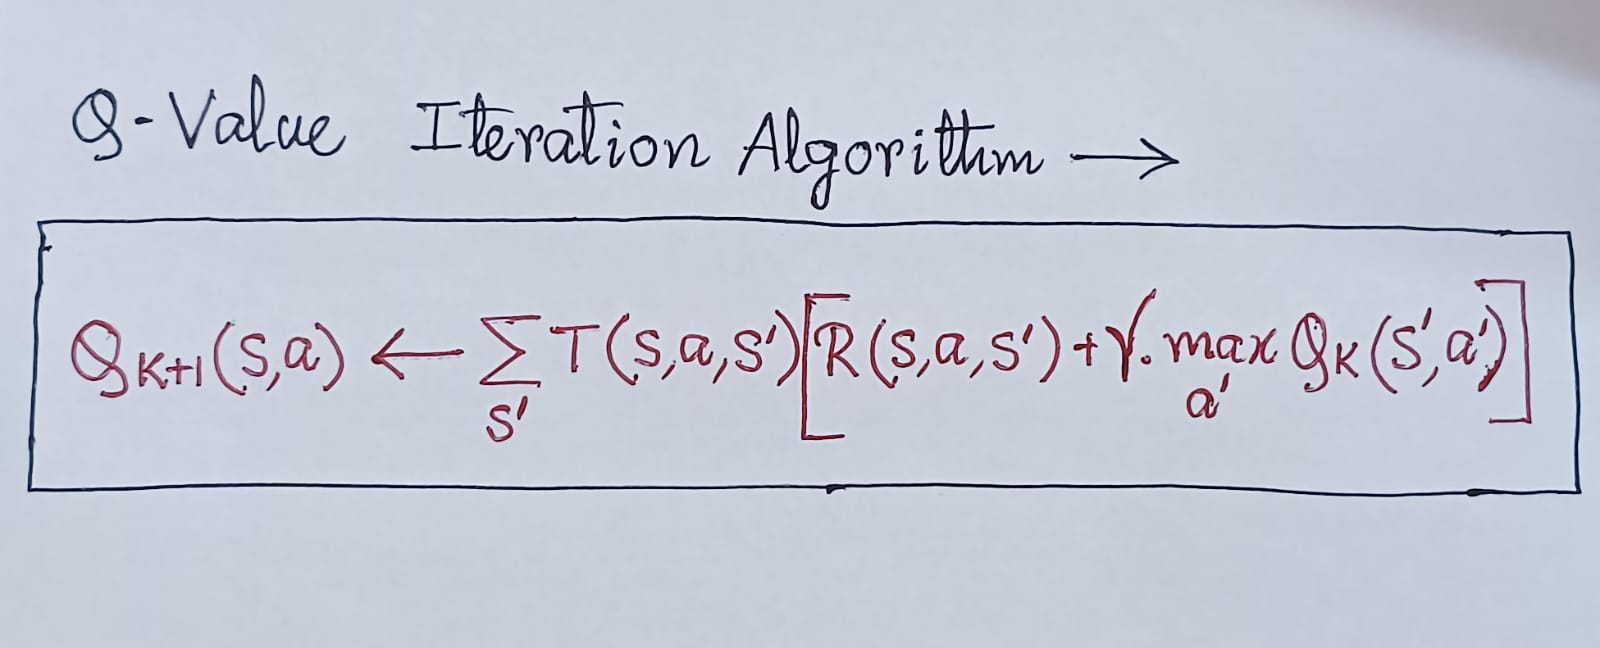

In [1]:
transition_probabilities = [
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],  # Shape => [s,a,s']
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
    [None, [0.8, 0.1, 0.1], None]
]

rewards = [
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]
]

possible_actions = [[0, 1, 2], [0, 2],[1]]

In [3]:
import numpy as np

Q_values = np.full((3, 3), -np.inf)   # -np.inf --> Impossible actions;

for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0     # For all possible actions;

In [5]:
gamma = 0.90    # The discount factor;

for iteration in range(50):
    Q_prev = Q_values.copy()
    
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                transition_probabilities[s][a][sp] * (rewards[s][a][sp] + gamma
                                            * Q_prev[sp].max())
                for sp in range(3)
            ])

In [6]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [7]:
Q_values.argmax(axis = 1)     # Optimal action for each state;

array([0, 0, 1], dtype=int64)